In [12]:
import numpy as np # we import numpy because it works with arrays and matrices  
import matplotlib.pyplot as plt # we import matplotlib to show our graph 

In [13]:
# this function initialize a matrix of distance that ant walk through 
def distance(space):
    distance = np.zeros((space.shape[0] , space.shape[0]))# we initialize a 0 matrix of distance that means that ant at the start point in our space 
    for index , point in enumerate(space):# we make for loop through index of matrix and calculate distance from our point to space that has all points , 'enumerate' is used for returning the index of every point and the value of it as a list 
        distance[index]=np.sqrt(((space-point)**2).sum(axis=1))# here we calculate distance between our point and the space points by squaring difference between them and sum the axis=1 is to put it in matrix 
    with np.errstate(all='ignore'):# to handel division by 0 error ,'errstate' manager allows statments in the context to excute with a known error hamdling behavoir 
        inverse_distance=1/distance # we inverse distance that ant walks throught it due to the equation of nij that inverse the distance  
    inverse_distance[inverse_distance==np.inf]=0# replace infinity by 0 to prevent division zero error 
    return inverse_distance# returning inverse distance 

In [14]:
# this function initialize ants by the space that it will move through and colony the size of ants 
def ants(space , colony):
    return np.random.randint(space.shape[0] , size=colony )# we initialize randomly the initial points that ant will start with in an 1d array and initialize the size of ants by colony   

In [15]:
# this function is responsible for the movement of ants in the space by the equation of tau the amount of pheromone across edges and equation of probability 'pij' that responsible for how to choose best edge tomove through it 
def move(space , position , inverse_distance , pheromones , alpha , beta , tau):
    path = np.zeros((space.shape[0] , position.shape[0]), dtype = int)-1  # it is empty 2d matrix we add through it the paths of ants , its type is integer 
    path[0]=position # initialize start postion at node 0
    for node in range(1,space.shape[0]):# for nodes in range from 1 to the space nodes 
        for ant in range(position.shape[0]):# for each ant in range of positon 
            pij=(inverse_distance [position[ant]] ** beta + pheromones[position[ant]] ** alpha / inverse_distance[position[ant]].sum()** beta + pheromones[position[ant]].sum() ** alpha)# this equation calculate the probability to choose which edge we will walk through

            new_position=np.argwhere(pij==np.amax(pij))[0][0]# 'argwhere' is to search through the array to the maximum pij by 'amax' and put it in an index of 0,0
            while new_position in path[:,ant]:# we will make while loop for checking if node has been vistied before or not 
                pij[new_position]=0.0# here we put the already vistied node probability by 0 
                new_position=np.argwhere(pij==np.amax(pij))[0][0]# we comapre in every iteration if pij is maximum so we will put it in the first index and so on
                
            path[node , ant]=new_position # here we add nodes that we visit to the path that ant walks through
            
            pheromones[node , new_position]= pheromones[node , new_position]+tau# we update pheromones at each new position 
    return np.swapaxes(path,0,1)# returning the path taken by ant by swaping the old path with new path 

                
                
            
        

In [16]:
# this function responsible for the ant colony optimization algorithm , we initialize space as data , number of iteration , number in colony , alpha & beta& tau by 1 as default , and evaportaion is for evaporation rate of pheromones by default 0.5
def aco(space , iteration=80 , colony=50 , alpha=1.0 , beta=1.0 , tau=1.0 , evaporation=0.5):
    distance_inverse = distance(space)# find inverted distance for each node
    distance_inverse= distance_inverse**beta # add beta algorithm to invert distance
    pheromones = np.zeros((space.shape[0],space.shape[0]))# we initialize pheromones by an empty matrix
    minimum_distance=None# we initialize minimum distance by none
    minimum_path = None# we initialize minimum path by none
    for i in range(iteration):# for loop for every iteration 
        position = ants(space , colony)# we initialize position of ants 
        path_ant=move(space,position,distance_inverse , pheromones , alpha , beta , tau)# we call the function of move to calculate path and return the optimal path
        pheromones *=(1-evaporation) # to calculate the pheromones evaporation
        for path in path_ant:# for each path that ants take 
            edge=0 # we make distance equal 0 to prevent it moves to this edge again
            for node in range (1 , path.shape[0]):# for each node from the next node to the end of array
                edge+=np.sqrt(((space[int(path[node])]-space[int(path[node-1])])**2).sum())# here we calculate distance from my node to next node square and then sum result because it is cmulative 
            if not minimum_distance or edge<minimum_distance:# we update minimum distance and path if edge we calculate is less than minimum distance so we will take this value as minimum distance and we add this path to minimum path
                minimum_distance=edge
                minimum_path=path
        minimum_path=np.append(minimum_path , minimum_path[0])# we put the minimum path in an 1d array  putting first node at the first index and last index to form closed path
        return (minimum_path , minimum_distance)# this function will return the minimum distance and path

In [17]:
# this function is used to read data of tsp and make it in x , y coordinates
def data(tsp):
    file = open(tsp,'r')
    name = file.readline().strip().split()[1]# this line reads the first line in data name                  
    type = file.readline().strip().split()[1] # this line reads the second line in data type                   
    comment = file.readline().strip().split()[1]# this line reads the third line in data comment                 
    cities = file.readline().strip().split()[1]# it reads the number of cities we have , strip for removing whitespaces and get number exactly and split to split our value from arounding values and take the first value at index 1  
    edge_weight_type = file.readline().strip().split()[1] # this line reads the fifth line in data edge weight        
    NODE_COORD_SECTION = [] # to get the data columes and put it in an array                                        
    file.readline()# it reads the data line by line
    for i in range(0, int(cities)): # read columes of data 'node coord section' and put it in x and y coordinates to be able to work with it
        x,y=file.readline().strip().split()[1:] # we read every value and split it from the surrounding values and read the value starts with index 1 because it is the data of nodes begins in index 1
        NODE_COORD_SECTION.append([float(x) , float(y)])# we put elements in x first then elements of y 
    file.close()#it closes the file 
    return {'name': name,
        'type': type,
        'comment': comment,
        'cities': cities,
        'edge_weight_type': edge_weight_type,
        'node_coord_section': NODE_COORD_SECTION} # return the value of data 

In [18]:
tsp=data('kroA100.tsp') # we call data function to read the data 

In [19]:
space=np.array(tsp['node_coord_section'])# we initialize space as an array of node_coord_section that represent our data 

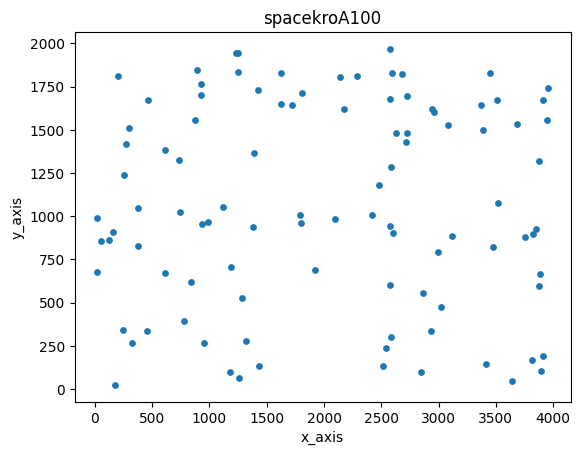

In [20]:
plt.scatter(space[:,0] , space[:,1] , s=15) # initialize the plot of nodes by making x equals all the colume at index 0 and making y equals all the colume at index 1 and s is for area we will make it equals 15 and plot it as scatter plot
plt.title('space{}'.format(tsp['name']))# we initialize the title of graph by name of data and format is for inserting name of data in the graph 
plt.xlabel('x_axis')# we initialize the xlabel by x_axis
plt.ylabel('y_axis')# we initialize the y label by y_axis
plt.show()# to show the graph


In [21]:
minimum_path , minimum_distance=aco(space)# we initialize minimum distance and path by calling method aco and give to it space

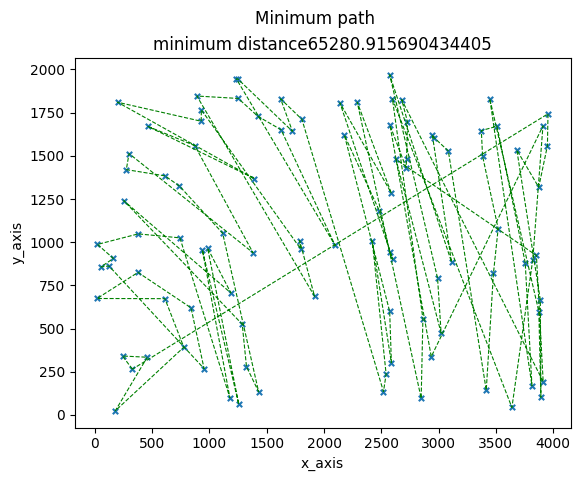

In [22]:
plt.scatter(space[:,0] , space[:,1] , marker='x' , s=15) # we make a scatter plot with data and marks x to the ants and s is for area 
plt.plot(space[minimum_path ,0] , space[minimum_path ,1] , c='g',linewidth=0.8 , linestyle="--")# we make plot to minimum distance at index 0 and minimum path at index 1 and making color by green and line style this is for the apperence of line and line width it is the width of line
plt.suptitle('Minimum path')# we initialize the suptitle of graph by minimum path 
plt.title('minimum distance{}' .format(minimum_distance))# we initiaize title by the value of minimum distance , format is for inserting the value of minimum distance beside its name 
plt.xlabel('x_axis')# we initialize the xlabel by x_axis
plt.ylabel('y_axis')# we initialize the y label by y_axis
plt.show()# to show the graph
